In [1]:
import os
import numpy as np
import pandas as pd
import cantera as ct

import matplotlib.pyplot as plt
%matplotlib inline

$C_4H_{10} + \frac{13}{2}O_2 \leftrightharpoons 4CO_2 + 5H_2O\$

In [2]:
# load the experimental conditions
flame_speed_data = '/work/westgroup/harris.se/autoscience/autoscience/butane/experimental_data/butane_flamespeeds.csv'
df_exp = pd.read_csv(flame_speed_data)

In [3]:
references = set(df_exp['Reference'].values)

In [8]:
references

{'Davis and Law  1998',
 'Dirrenberger et al. 2011',
 'Hirasawa et al. 2002',
 'Kelley and Law 2009',
 'Park et al. 2016',
 'Tang et al. 2011',
 'Veloo et al. 2010',
 'Wang et al. 2011',
 'Wu et al. 2014'}

In [9]:

data_slice = df_exp[df_exp['Reference'] == 'Park et al. 2016']


# Define Initial conditions using experimental data
speeds = data_slice['SL0 (cm/s)'].values.astype(float)  # ignition delay
temperatures = data_slice['Tu (K)'].values  # Temperatures
pressures = data_slice['Pu (atm)'].values * ct.one_atm  # pressures in atm
equiv_ratios = data_slice['Equivalence Ratio'].values  # equivalence ratio


# list of starting conditions
# Define stoichiometric coefficients
v_fuel = 1.0
v_oxidizer = 13.0 / 2.0
v_N2 = 0.79 * (v_oxidizer / 0.21)  # air is approximately 79% N2 and 21% O2

# calculate actual ratio of fuel to oxidizer
actual_ratio = equiv_ratios * (v_fuel / v_oxidizer)


# start with 1.0 oxidizer, then normalize
x_O2 = 1.0
x_C4H10 = actual_ratio * x_O2
x_N2 = 0.79 * (x_O2 / .21)
total = x_O2 + x_C4H10 + x_N2
x_O2 = x_O2 / total
x_C4H10 = x_C4H10 / total
x_N2 = x_N2 / total

concentrations = [{'butane(1)': x_C4H10[i], 'O2(2)': x_O2[i], 'N2': x_N2[i]} for i in range(0, len(equiv_ratios))]

In [10]:
flame_speed_sim_csv = '/work/westgroup/harris.se/autoscience/reaction_calculator/plot_flame_speeds/improved_model/cutoff3_20230418.csv'
fs_df = pd.read_csv(flame_speed_sim_csv)
print(fs_df)

    Unnamed: 0         0
0            0  0.212832
1            1  0.257883
2            2  0.298892
3            3  0.368033
4            4  0.418523
5            5  0.425041
6            6  0.432683
7            7  0.439226
8            8  0.436283
9            9  0.424465
10          10  0.370920
11          11  0.276632


In [11]:

base_rmg = 100 * np.array([0.21292188, 0.2557007 , 0.29758701, 0.36655334, 0.41552749,
       0.42222228, 0.42983309, 0.43708021, 0.43494932, 0.4249512 ,
       0.37208585, 0.277988  ])  # 24 hour RMG run - 110 species
aramco = 100 * np.array([0.22198799, 0.26511389, 0.30178048, 0.36128909, 0.39329004,
       0.39679172, 0.39971809, 0.39873471, 0.38734159, 0.36550394,
       0.29134016, 0.2033246 ])

improved_rmg = 100 *np.array([
0.212832,
0.257883,
0.298892,
0.368033,
0.418523,
0.425041,
0.432683,
0.439226,
0.436283,
0.424465,
0.370920,
0.276632])

Tang et al. 2011
Davis and Law  1998
Hirasawa et al. 2002
Dirrenberger et al. 2011
Park et al. 2016
Kelley and Law 2009
Wu et al. 2014


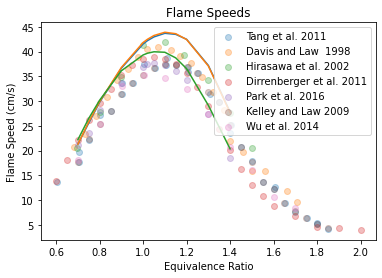

In [19]:
# plot the flame speed

plt.plot(equiv_ratios, base_rmg)
plt.plot(equiv_ratios, improved_rmg)
plt.plot(equiv_ratios, aramco)


for key in references:
    # get just one data set:
    
    # skip the 5 oldest
#     if '1998' in key or '2002' in key or '2009' in key or '2011' in key:
#         continue
#     if '2016' not in key:
#         continue
    
    data_slice = df_exp[df_exp['Reference'] == key]
    if int(data_slice['Tu (K)'].values[0]) != 300:
        continue
    x = data_slice['Equivalence Ratio'].values  # equivalence ratio
    y = data_slice['SL0 (cm/s)'].values.astype(float)  # ignition delay
    plt.scatter(x, y, marker='o', label=key, alpha=0.3)
#     plt.scatter(x, y, marker='x', label=key, color='black')
    print(key)
plt.legend()
#plt.legend(['Base RMG Model', 'Improved RMG Model', 'Aramco', 'Experiment'])
plt.title('Flame Speeds')
plt.xlabel('Equivalence Ratio')
plt.ylabel('Flame Speed (cm/s)')
plt.savefig('flame_speed.png')

In [9]:
for r in df_exp['Tu (K)']:
    print (r)

300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
343
343
343
343
343
343
343
343
343
343
403
403
403
403
403
403
403
403
403
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
